<a href="https://colab.research.google.com/github/Abhi050/Machine_Learning/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("Social_Network_Ads.csv")
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values


In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
#Fitiing the model using svm
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
#try kernel = linear,poly,rbf,sigmoid,precomputed or callable
classifier.fit(train_x,train_y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
pred=classifier.predict(test_x)
c=0
for i in range(len(pred)):
    print(pred[i],"------",test_y[i])
    if pred[i] == test_y[i]:
        c+=1
print((c/len(pred))*100)

0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 1
1 ------ 1
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 1
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 0
1 ------ 1
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 1
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 0
0 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
1 ------ 1
1 ------ 1
1 ------ 0
0 ------ 0
0 ------ 0
1 ------ 1
0 ------ 1
0 ------ 0
1 ------ 1
1 ------ 1
0 ------ 0
0 ------ 0

In [41]:
#Making Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,pred)
print(cm) 

[[64  4]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


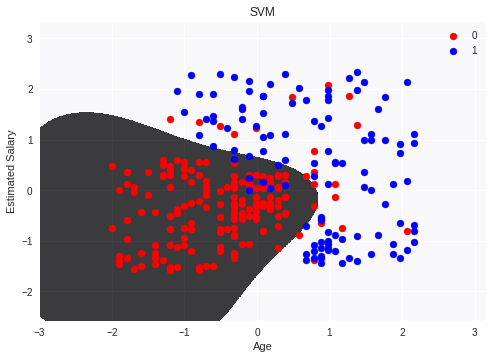

In [42]:
from matplotlib.colors import ListedColormap
x_set,y_set = train_x,train_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("black","white")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set ==j,1],c=ListedColormap(("red","blue"))(i),label =j)
plt.title("SVM")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


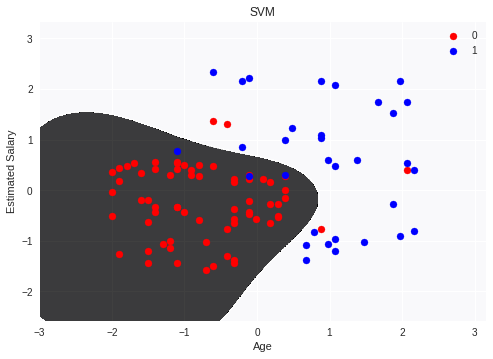

In [43]:
from matplotlib.colors import ListedColormap
x_set,y_set = test_x,test_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step=0.01),np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(("black","white")))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set ==j,1],c=ListedColormap(("red","blue"))(i),label =j)
plt.title("SVM")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()